In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyodide.http import pyfetch
import asyncio

api_url = 'https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days={}&interval=daily'
headers={'Content-type':'text/plain'}
async def get_crypto_data(coin, days):
  json_url = api_url.format(coin, days)
  resp = await pyfetch(json_url, method="GET", headers=headers)
  bjson = await resp.json()
  prices = bjson["prices"]
  df_price = pd.DataFrame(prices)  
  df_price = df_price.rename({0: 'date', 1: 'price'}, axis=1)  # new method
  df_price = df_price.set_index('date')
  return df_price

crypto = ['ethereum','bitcoin']

crypto_data = {}
for coin in crypto:
  crypto_price_df = await get_crypto_data(coin, 200)
  crypto_data[coin] = crypto_price_df
    
dfp = pd.concat([crypto_data['bitcoin']['price'],crypto_data['ethereum']['price']], axis=1)
dfp.columns = ['bitcoin','ethereum']


mean_daily_ret = dfp.pct_change(1).mean()
print("Daily Return: ", mean_daily_ret)

corr = dfp.pct_change(1).corr()
print("Correlation Matrix: ", corr)
crypto_normed = dfp/dfp.iloc[0]
fig = crypto_normed.plot(figsize=(100,100))
print(fig)

ModuleNotFoundError: No module named 'pyodide'

Daily Return:  bitcoin    -0.002893
ethereum   -0.003400
dtype: float64
Correlation Matrix:             bitcoin  ethereum
bitcoin   1.000000  0.891099
ethereum  0.891099  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


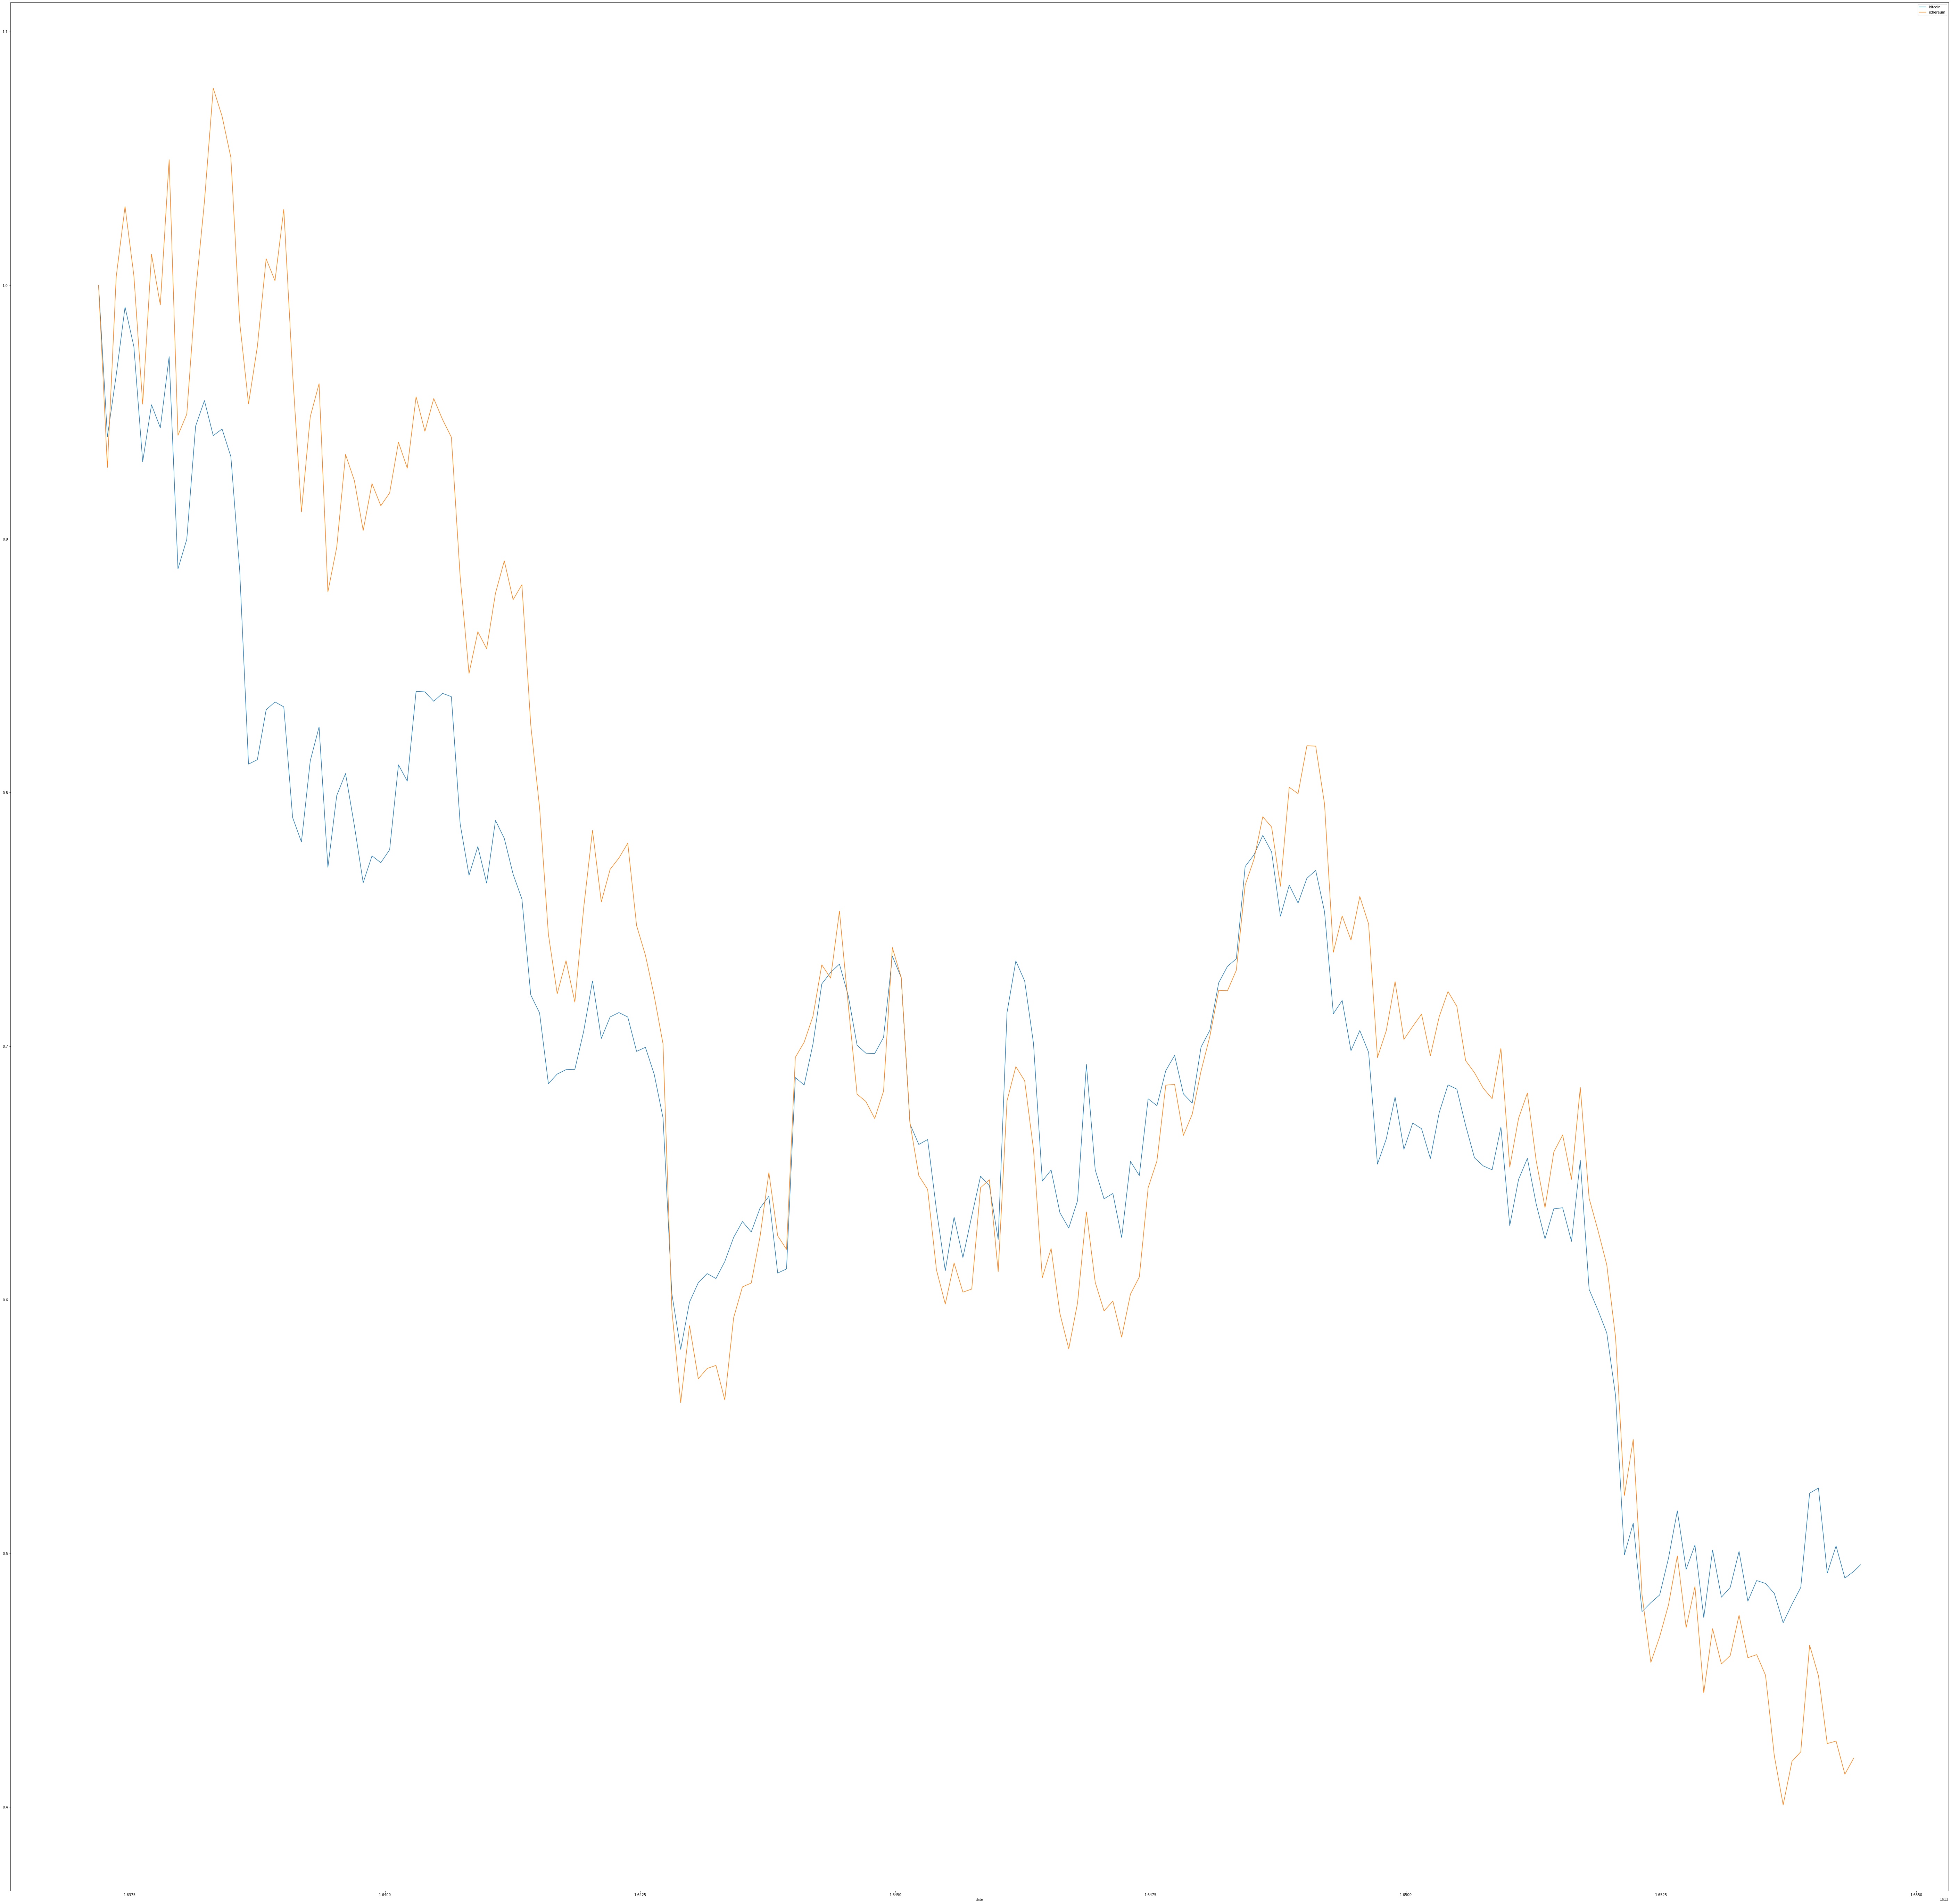

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# from pyodide.http import pyfetch
# import asyncio

api_url = 'https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days={}&interval=daily'
headers={'Content-type':'text/plain'}
def get_crypto_data(coin, days):
    '''Retrieve cryptocurrency data from poloniex'''
    json_url = api_url.format(coin, days)
    resp = requests.get(json_url)
    bjson = resp.json()
    prices = bjson["prices"]
    df_price = pd.DataFrame(prices)  
    df_price = df_price.rename({0: 'date', 1: 'price'}, axis=1)  # new method
    df_price = df_price.set_index('date')
    return df_price

crypto = ['ethereum','bitcoin']

crypto_data = {}
for coin in crypto:
  crypto_price_df = get_crypto_data(coin, 200)
  crypto_data[coin] = crypto_price_df
    
dfp = pd.concat([crypto_data['bitcoin']['price'],crypto_data['ethereum']['price']], axis=1)
dfp.columns = ['bitcoin','ethereum']


mean_daily_ret = dfp.pct_change(1).mean()
print("Daily Return: ", mean_daily_ret)

corr = dfp.pct_change(1).corr()
print("Correlation Matrix: ", corr)
crypto_normed = dfp/dfp.iloc[0]
fig = crypto_normed.plot(figsize=(100,100))
fig, ax = plt.subplots()